In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from EVO.CPG.revde_optimizer import (DbRevDEOptimizerIndividual,
                             DbRevDEOptimizerIndividual)
from revolve2.core.database import open_database_sqlite
from sqlalchemy.future import select
import numpy as np

In [7]:
morphologies = ['spider', 'gecko', 'babya', 'ant','salamander','blokky','park','babyb','garrix','insect','linkin','longleg','penguin',
                'pentapod','queen','squarish','snake','stingray','tinlicker','turtle','ww','zappa']

In [9]:
morphologies = ['spider', 'gecko', 'babya','salamander']

In [2]:
morphologies = ['spider', 'gecko']

In [10]:
morphologies = ['babya']

In [10]:
process_id = 0

evo_data = []
for body in morphologies:
    body_data = []
    for n in range(1,6):
        database = 'test/RevDENN/'+body+'/database'+str(n)
        # open the database
        db = open_database_sqlite(database)
        # read the optimizer data into a pandas dataframe
        df = pd.read_sql(
            select(DbRevDEOptimizerIndividual).filter(
                DbRevDEOptimizerIndividual.process_id == process_id
            ),
            db,
        )
        df = df.sort_values(by='individual')[["fitness"]]
        body_data.append(df)
    evo_data.append(body_data)

ppo_data = []
for body in morphologies:
    body_data = []
    for n in range(1,6):
        database = 'data/PPO_280/'+body+'/database'+str(n)
        # open the database
        df = pd.read_csv(database + '/fitnesses.csv')
        body_data.append(df)
    ppo_data.append(body_data)

In [12]:
process_id = 0

ppo_data1 = []
for body in morphologies:
    body_data = []
    for n in range(1,6):
        database = 'data/PPO/'+body+'/database'+str(n)
        # open the database
        df = pd.read_csv(database + '/fitnesses.csv')
        body_data.append(df)
    ppo_data1.append(body_data)

ppo_data2 = []
for body in morphologies:
    body_data = []
    for n in range(1,6):
        database = 'data/PPO_580/'+body+'/database'+str(n)
        # open the database
        df = pd.read_csv(database + '/fitnesses.csv')
        body_data.append(df)
    ppo_data2.append(body_data)

ppo_data3 = []
for body in morphologies:
    body_data = []
    for n in range(1,6):
        database = 'data/PPO2/'+body+'/database'+str(n)
        # open the database
        df = pd.read_csv(database + '/fitnesses.csv')
        body_data.append(df)
    ppo_data3.append(body_data)

ppo_data4 = []
for body in morphologies:
    body_data = []
    for n in range(1,6):
        database = 'data/PPO3/'+body+'/database'+str(n)
        # open the database
        df = pd.read_csv(database + '/fitnesses.csv')
        body_data.append(df)
    ppo_data4.append(body_data)

In [13]:
process_id = 0

ppo_data1 = []
for body in morphologies:
    body_data = []
    for n in range(1,6):
        database = 'data/PPO/'+body+'/database'+str(n)
        # open the database
        df = pd.read_csv(database + '/fitnesses.csv')
        body_data.append(df)
    ppo_data1.append(body_data)

ppo_data2 = []
for body in morphologies:
    body_data = []
    for n in range(1,6):
        database = 'data/PPO_580/'+body+'/database'+str(n)
        # open the database
        df = pd.read_csv(database + '/fitnesses.csv')
        body_data.append(df)
    ppo_data2.append(body_data)

In [6]:
def single_body_analysis(data):
    max_values = np.zeros(shape=len(data))
    for i, df in enumerate(data):
        df_max = df['fitness'].max()
        max_values[i] = df_max
    print('Maximum fitness: ' + str(np.max(max_values)))
    print('Average maximum fitness: ' + str(np.mean(max_values)))
    print('Variance of max values: ' + str(np.var(max_values)))

def plot_compare(algo_data, labels):
    colors = plt.cm.rainbow(np.linspace(0, 1, len(algo_data)))
    fig, ax = plt.subplots()
    for idx, data in enumerate(algo_data):
        d = np.zeros((len(data), len(data[0])))
        for i, run_data in enumerate(data):
            d[i] = np.array(run_data['fitness'])
        mean = np.mean(d, axis=0)
        variance = np.std(d, axis=0)
        ax.plot(mean, color=colors[idx], label=labels[idx])
        ax.fill_between(range(1, len(mean) + 1), mean-variance, mean+variance, color=colors[idx], alpha=0.1)
        plt.legend()
    plt.show()


Morphology: spider
Statistics for RevDe:
Maximum fitness: 5.204149188238991
Average maximum fitness: 4.030161992628678
Variance of max values: 0.4509486462308877
Statistics for PPO:
Maximum fitness: 3.2637277809396816
Average maximum fitness: 2.2496082532376356
Variance of max values: 0.5479224203533846


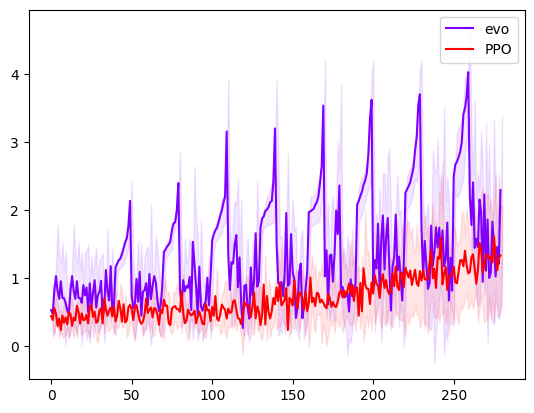


Morphology: gecko
Statistics for RevDe:
Maximum fitness: 6.369669283060552
Average maximum fitness: 5.3611701639721625
Variance of max values: 1.3026190477790907
Statistics for PPO:
Maximum fitness: 5.298262931272218
Average maximum fitness: 4.846444351703878
Variance of max values: 0.13838372785525788


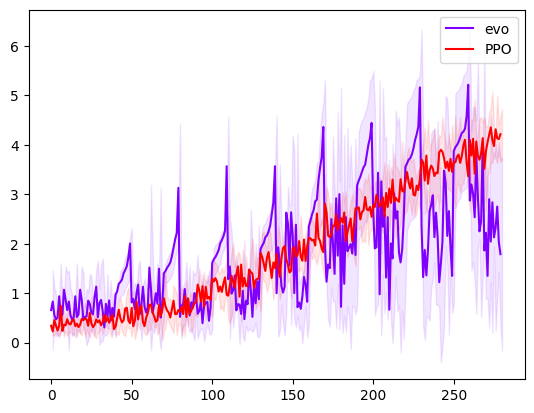


Morphology: babya
Statistics for RevDe:
Maximum fitness: 4.746188315056261
Average maximum fitness: 3.635021310458859
Variance of max values: 0.6745625089583107
Statistics for PPO:
Maximum fitness: 3.560383344596968
Average maximum fitness: 2.8764895819123883
Variance of max values: 0.14470395692926763


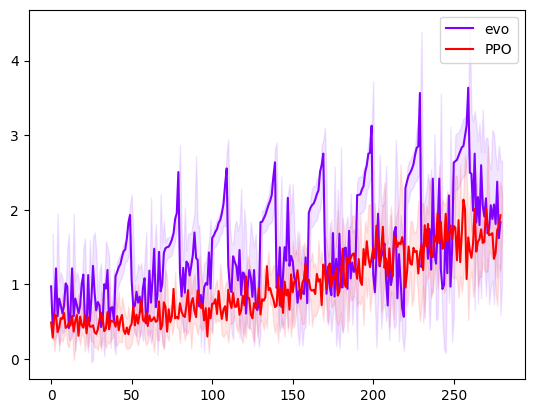


Morphology: salamander
Statistics for RevDe:
Maximum fitness: 3.637485142892442
Average maximum fitness: 3.047494337786671
Variance of max values: 0.18906865376329468
Statistics for PPO:
Maximum fitness: 2.8664353657355903
Average maximum fitness: 2.305388837547118
Variance of max values: 0.17086787268856757


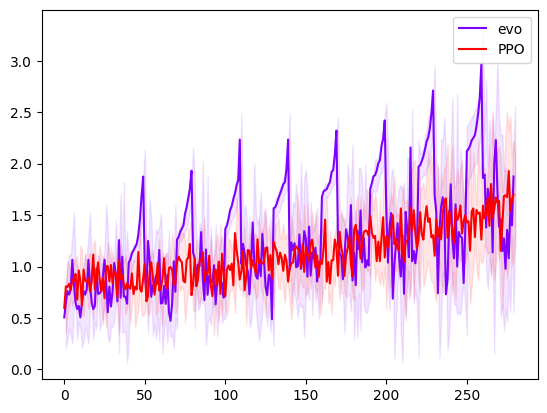

In [11]:
for i, body in enumerate(morphologies):
    print('Morphology: ' + body)
    print('Statistics for RevDe:')
    single_body_analysis(evo_data[i])
    print('Statistics for PPO:')
    single_body_analysis(ppo_data[i])
    plot_compare([evo_data[i], ppo_data[i]], labels=['evo', 'PPO'])
    print()
    

Morphology: spider
Statistics for RevDe:
Maximum fitness: 3.564096283701837
Average maximum fitness: 2.34102448511294
Variance of max values: 0.4769569318083377
Statistics for PPO:
Maximum fitness: 4.927887902387106
Average maximum fitness: 4.511441927516349
Variance of max values: 0.0690493088441563


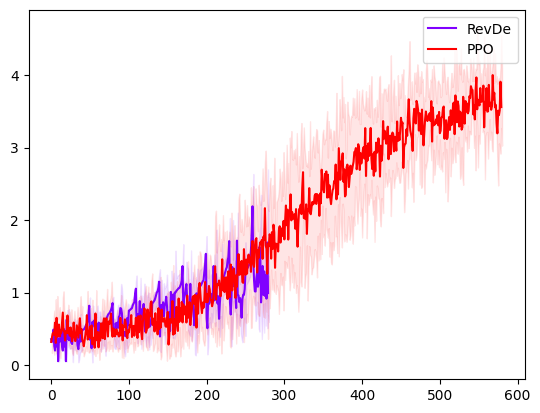


Morphology: gecko
Statistics for RevDe:
Maximum fitness: 2.327444009217899
Average maximum fitness: 1.9203409741511905
Variance of max values: 0.08748763587364727
Statistics for PPO:
Maximum fitness: 7.254644282037949
Average maximum fitness: 6.4008616353255166
Variance of max values: 0.21155417667177998


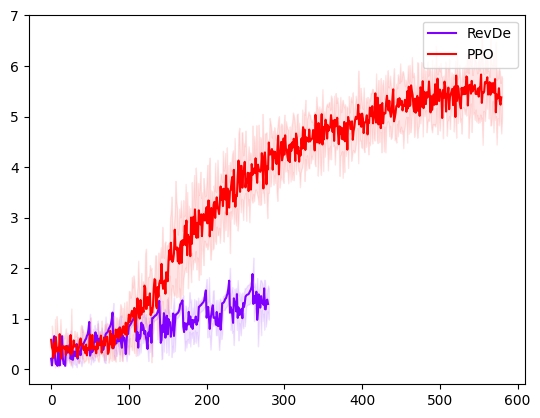


Morphology: babya
Statistics for RevDe:
Maximum fitness: 2.4520097165998602
Average maximum fitness: 2.033229424901903
Variance of max values: 0.05561148736525919
Statistics for PPO:
Maximum fitness: 5.599302033124678
Average maximum fitness: 4.4187828990070255
Variance of max values: 0.8035093567610796


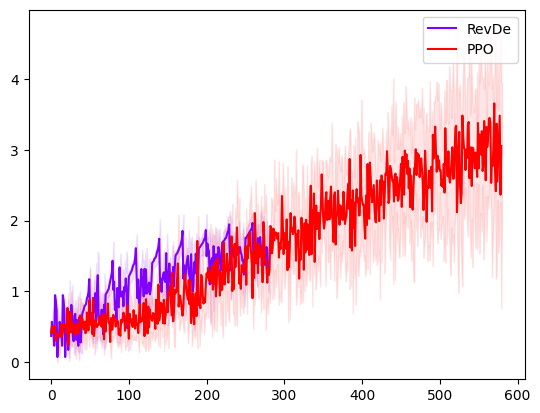


Morphology: ant
Statistics for RevDe:
Maximum fitness: 2.8227111985221525
Average maximum fitness: 1.9833735294625463
Variance of max values: 0.21286518474746816
Statistics for PPO:
Maximum fitness: 5.660508545355739
Average maximum fitness: 4.966539114608141
Variance of max values: 0.1666838226606088


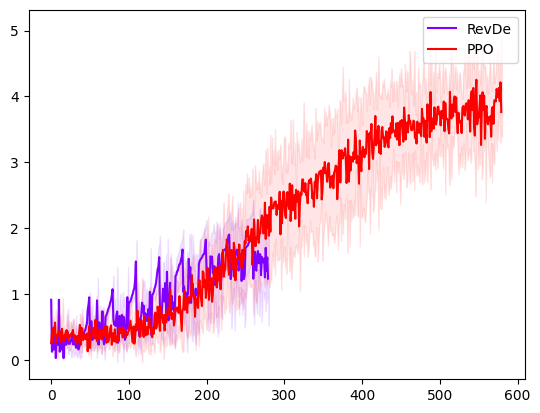


Morphology: salamander
Statistics for RevDe:
Maximum fitness: 2.6956546232700087
Average maximum fitness: 2.434527265456569
Variance of max values: 0.05864451070600709
Statistics for PPO:
Maximum fitness: 5.541512033464571
Average maximum fitness: 4.715558466640801
Variance of max values: 0.23168936526647377


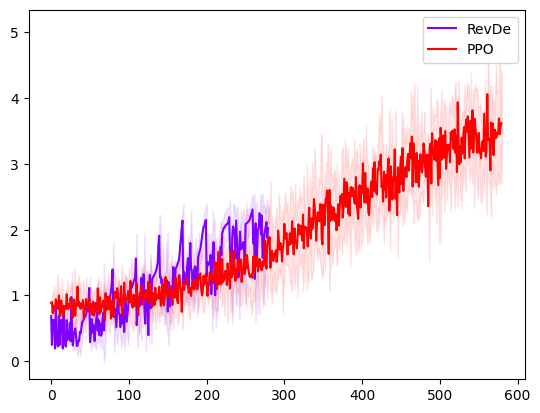


Morphology: blokky
Statistics for RevDe:
Maximum fitness: 1.7809080089973621
Average maximum fitness: 1.7084944293814215
Variance of max values: 0.0036541375576888864
Statistics for PPO:
Maximum fitness: 6.86680341674391
Average maximum fitness: 6.579345054886417
Variance of max values: 0.05590768742419834


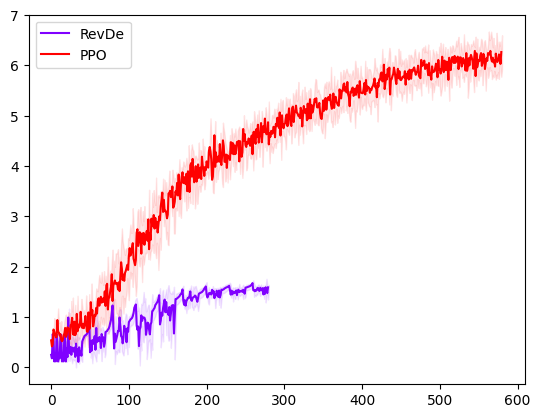


Morphology: park
Statistics for RevDe:
Maximum fitness: 1.3688563449754227
Average maximum fitness: 1.2551698608607917
Variance of max values: 0.0036049510484104817
Statistics for PPO:
Maximum fitness: 5.599327927290913
Average maximum fitness: 5.302280695898676
Variance of max values: 0.167272243436657


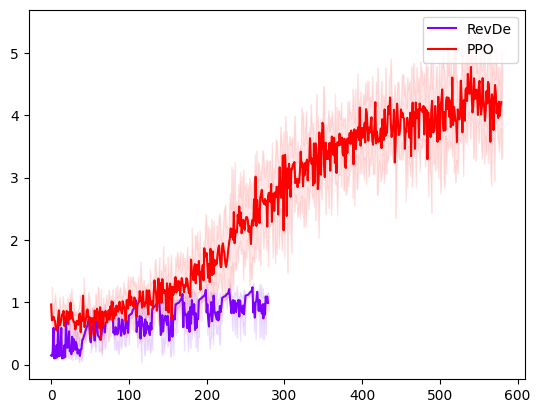


Morphology: babyb
Statistics for RevDe:
Maximum fitness: 2.7018167213661277
Average maximum fitness: 2.369839010863814
Variance of max values: 0.11803154269919494
Statistics for PPO:
Maximum fitness: 4.115141495859461
Average maximum fitness: 3.8725859828682117
Variance of max values: 0.038010411564894306


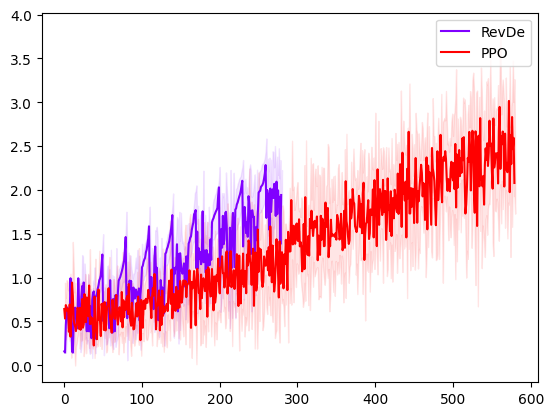


Morphology: garrix
Statistics for RevDe:
Maximum fitness: 1.9629252896454816
Average maximum fitness: 1.7346280052390928
Variance of max values: 0.016615919047184725
Statistics for PPO:
Maximum fitness: 3.515141344163148
Average maximum fitness: 3.280836614951108
Variance of max values: 0.046987087581816446


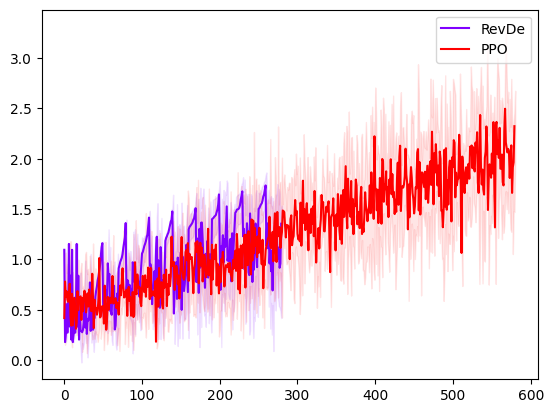


Morphology: insect
Statistics for RevDe:
Maximum fitness: 2.2453594456720594
Average maximum fitness: 1.9868412198968326
Variance of max values: 0.046105797964969074
Statistics for PPO:
Maximum fitness: 6.266894916977118
Average maximum fitness: 5.93884297662604
Variance of max values: 0.03292862305582379


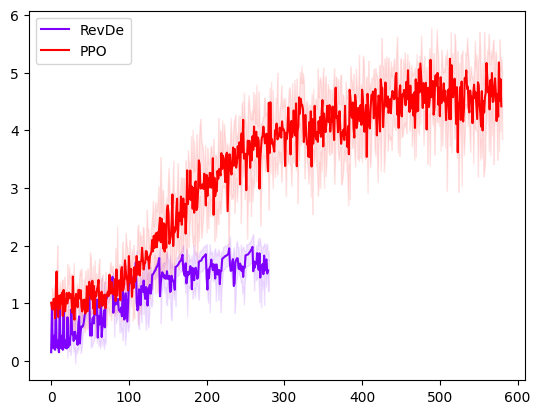


Morphology: linkin
Statistics for RevDe:
Maximum fitness: 2.8171428737619744
Average maximum fitness: 2.238894314636436
Variance of max values: 0.11778453083675325
Statistics for PPO:
Maximum fitness: 4.85257005743388
Average maximum fitness: 3.7537480059806763
Variance of max values: 0.6836826367396203


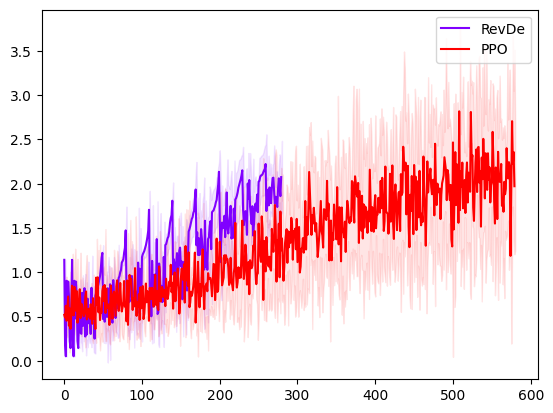


Morphology: longleg
Statistics for RevDe:
Maximum fitness: 2.730281076189512
Average maximum fitness: 2.4886406187271675
Variance of max values: 0.12576322970026804
Statistics for PPO:
Maximum fitness: 4.636872868221484
Average maximum fitness: 4.082074183894663
Variance of max values: 0.08863637094939399


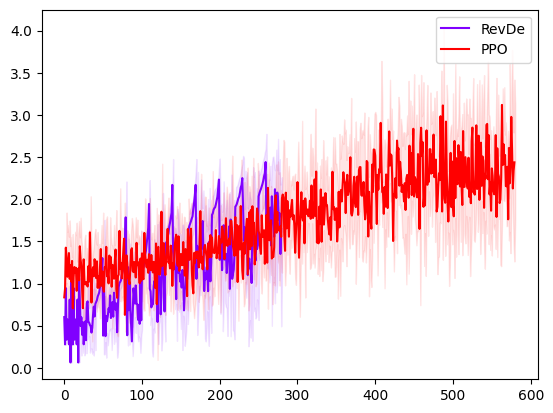


Morphology: penguin
Statistics for RevDe:
Maximum fitness: 3.855503182302831
Average maximum fitness: 2.9752100801497017
Variance of max values: 0.2855509597127176
Statistics for PPO:
Maximum fitness: 7.324748987411776
Average maximum fitness: 6.771952474580665
Variance of max values: 0.10089117994552761


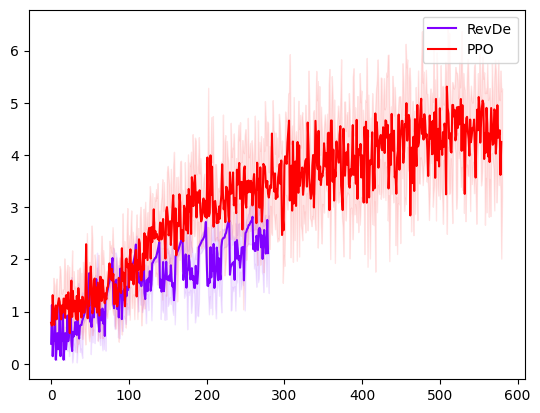


Morphology: pentapod
Statistics for RevDe:
Maximum fitness: 4.272932902099605
Average maximum fitness: 3.899636263513881
Variance of max values: 0.12049853373049477
Statistics for PPO:
Maximum fitness: 5.539654487417831
Average maximum fitness: 5.280613901802185
Variance of max values: 0.030711139350735495


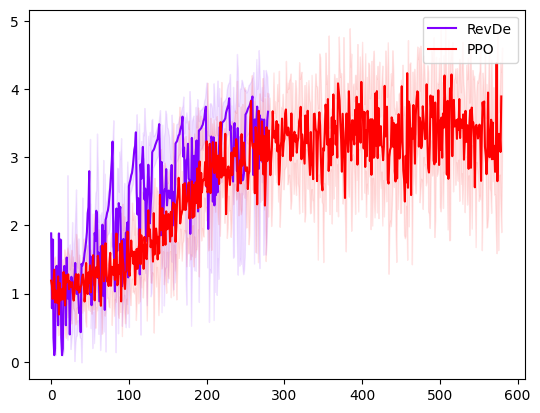


Morphology: queen
Statistics for RevDe:
Maximum fitness: 1.6564907560214264
Average maximum fitness: 1.5498934492290393
Variance of max values: 0.004507409570346127
Statistics for PPO:
Maximum fitness: 3.15570015908303
Average maximum fitness: 2.451360962888356
Variance of max values: 0.3440608986560595


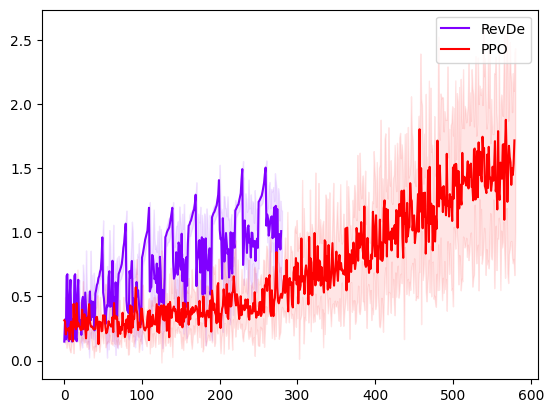


Morphology: squarish
Statistics for RevDe:
Maximum fitness: 0.9355008984473231
Average maximum fitness: 0.8546677931854643
Variance of max values: 0.002572245933689471
Statistics for PPO:
Maximum fitness: 5.917072925251857
Average maximum fitness: 5.290030885034813
Variance of max values: 0.17910844742267387


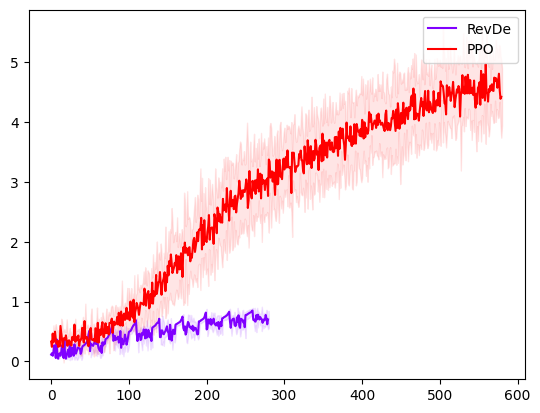


Morphology: snake
Statistics for RevDe:
Maximum fitness: 3.8560868849869383
Average maximum fitness: 3.296094042044936
Variance of max values: 0.13781841497399538
Statistics for PPO:
Maximum fitness: 3.839092247911623
Average maximum fitness: 3.3661139602476053
Variance of max values: 0.12213531133302771


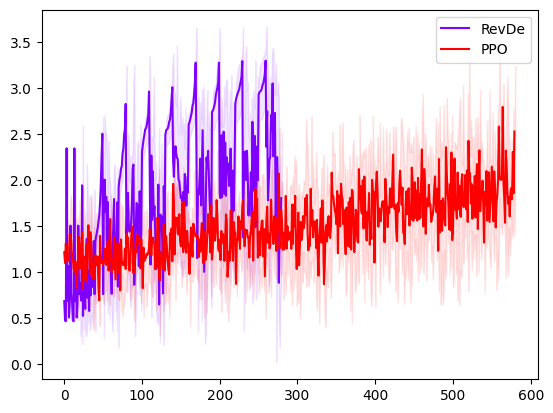


Morphology: stingray
Statistics for RevDe:
Maximum fitness: 1.974347368004955
Average maximum fitness: 1.634868599484765
Variance of max values: 0.0839714578618191
Statistics for PPO:
Maximum fitness: 5.533270691032657
Average maximum fitness: 5.217308258640404
Variance of max values: 0.0833012377673918


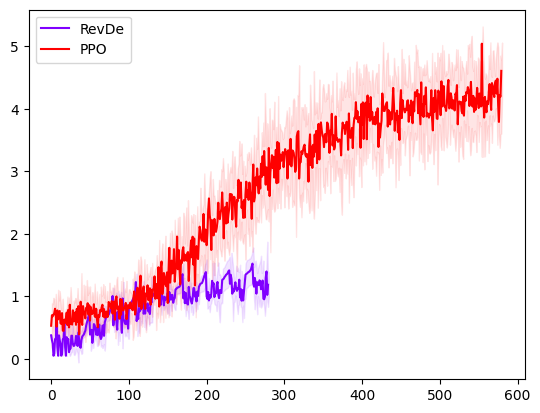


Morphology: tinlicker
Statistics for RevDe:
Maximum fitness: 3.3209458787684514
Average maximum fitness: 3.071331181565519
Variance of max values: 0.03759949229205352
Statistics for PPO:
Maximum fitness: 5.733811604251739
Average maximum fitness: 5.59713909987041
Variance of max values: 0.038485955193071505


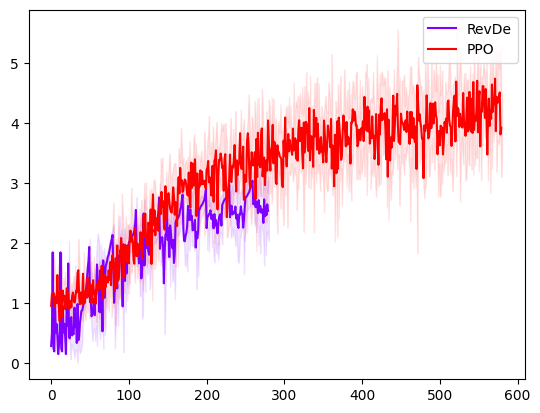


Morphology: turtle
Statistics for RevDe:
Maximum fitness: 2.0000910784945076
Average maximum fitness: 1.735978042118721
Variance of max values: 0.0346215191938936
Statistics for PPO:
Maximum fitness: 4.496512620929082
Average maximum fitness: 4.014144285372252
Variance of max values: 0.14300250673749856


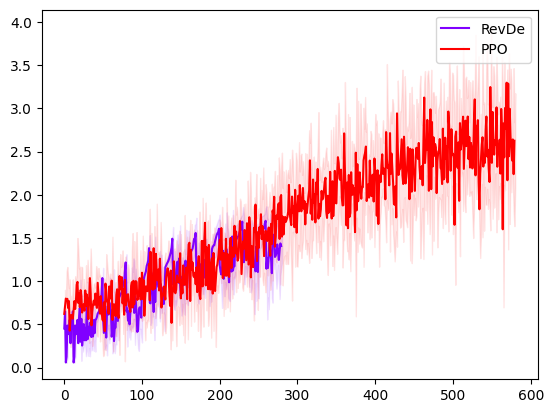


Morphology: ww
Statistics for RevDe:
Maximum fitness: 2.788427508288396
Average maximum fitness: 2.3370987045639597
Variance of max values: 0.09579736813377582
Statistics for PPO:
Maximum fitness: 5.86608813152986
Average maximum fitness: 5.77494754120781
Variance of max values: 0.004352171696530375


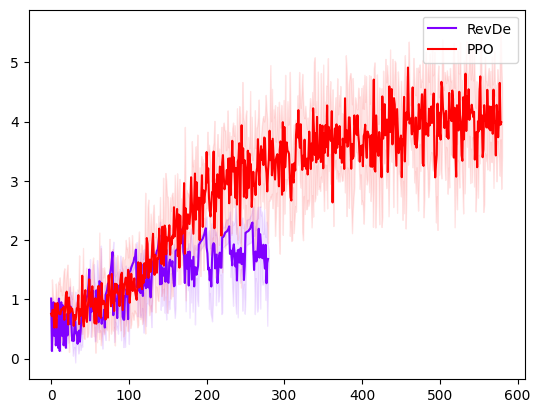


Morphology: zappa
Statistics for RevDe:
Maximum fitness: 3.4711075683642267
Average maximum fitness: 2.878926216249767
Variance of max values: 0.12998947197110639
Statistics for PPO:
Maximum fitness: 5.257029003488943
Average maximum fitness: 4.713792148830103
Variance of max values: 0.10599842440939297


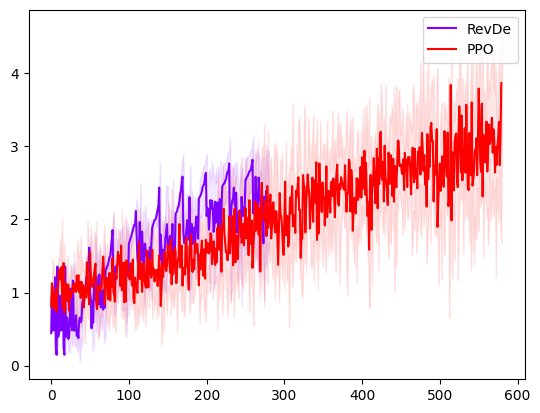

In [ ]:
for i, body in enumerate(morphologies):
    print('Morphology: ' + body)
    print('Statistics for RevDe:')
    single_body_analysis(evo_data[i])
    print('Statistics for PPO:')
    single_body_analysis(ppo_data[i])
    plot_compare([evo_data[i], ppo_data[i]], labels=['RevDe', 'PPO'])
    print()
    